# Bitcoin Price Prediction #

In [1]:
#Gerekli kütüphanelerin eklenmesi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("BTC-USD.csv") #veri setinin okunması

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-06,15579.729492,15903.437500,15226.839844,15565.880859,15565.880859,39837841971
1,2020-11-07,15565.880859,15737.095703,14423.203125,14833.753906,14833.753906,35024953706
2,2020-11-08,14833.753906,15637.320313,14744.110352,15479.567383,15479.567383,26632075029
3,2020-11-09,15479.595703,15785.136719,14865.529297,15332.315430,15332.315430,34149115566
4,2020-11-10,15332.350586,15450.329102,15124.959961,15290.902344,15290.902344,25574938143
...,...,...,...,...,...,...,...
361,2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,63226.402344,37746665647
362,2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,36124731509
363,2021-11-04,62941.804688,63123.289063,60799.664063,61452.230469,61452.230469,32615846901
364,2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,30605102446


In [5]:
df.info() #verimiz hakkında birtakım bilgilere ulaştık

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [6]:
df.head(10) #ilk 10 satırın okunması

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-06,15579.729492,15903.437500,15226.839844,15565.880859,15565.880859,39837841971
1,2020-11-07,15565.880859,15737.095703,14423.203125,14833.753906,14833.753906,35024953706
2,2020-11-08,14833.753906,15637.320313,14744.110352,15479.567383,15479.567383,26632075029
3,2020-11-09,15479.595703,15785.136719,14865.529297,15332.315430,15332.315430,34149115566
4,2020-11-10,15332.350586,15450.329102,15124.959961,15290.902344,15290.902344,25574938143
5,2020-11-11,15290.909180,15916.260742,15290.006836,15701.339844,15701.339844,29772374934
6,2020-11-12,15701.298828,16305.003906,15534.771484,16276.343750,16276.343750,34175758344
7,2020-11-13,16276.440430,16463.177734,15992.152344,16317.808594,16317.808594,31599492172
8,2020-11-14,16317.808594,16317.808594,15749.193359,16068.138672,16068.138672,27481710135
9,2020-11-15,16068.139648,16123.110352,15793.534180,15955.587891,15955.587891,23653867583


In [7]:
df.tail(10) #son 10 satırın okunması

,Date,Open,High,Low,Close,Adj Close,Volume
356,2021-10-28,58470.730469,62128.632813,58206.917969,60622.136719,60622.136719,45257083247
357,2021-10-29,60624.871094,62927.609375,60329.964844,62227.964844,62227.964844,36856881767
358,2021-10-30,62239.363281,62330.144531,60918.386719,61888.832031,61888.832031,32157938616
359,2021-10-31,61850.488281,62406.171875,60074.328125,61318.957031,61318.957031,32241199927
360,2021-11-01,61320.449219,62419.003906,59695.183594,61004.406250,61004.406250,36150572843
361,2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,63226.402344,37746665647
362,2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,36124731509
363,2021-11-04,62941.804688,63123.289063,60799.664063,61452.230469,61452.230469,32615846901
364,2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,30605102446
365,2021-11-06,60993.109375,61560.304688,60165.253906,60698.382813,60698.382813,29695062016


In [8]:
df.shape #veri setimizin kaç satır ve sütundan oluştuğunu gösterir.

(366, 7)

In [9]:
df.describe()#Burada  veri setinde istatistiki verilere ulaşabiliyoruz.Ortalama, standart sapma , 
# min ve max değerler, toplam vs...

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,42086.460623,43360.457162,40714.301238,42205.560680,42205.560680,4.795419e+10
std,13235.636033,13483.390560,12935.177785,13203.792203,13203.792203,2.449994e+10
min,14833.753906,15450.329102,14423.203125,14833.753906,14833.753906,1.878799e+10
25%,33692.977539,34765.743164,32263.608887,33728.771485,33728.771485,3.340022e+10
50%,43123.208985,44816.017578,41975.277344,43373.025391,43373.025391,4.283789e+10
75%,53489.539063,55383.115235,51044.201172,53743.265625,53743.265625,5.851956e+10
max,66002.234375,66930.390625,63610.675781,65992.835938,65992.835938,3.509679e+11


In [10]:
df.isnull().sum() #hiçbir özellikte eksik veri yok

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.isnull().sum().sum() #toplam eksik veri sayısı

0

In [12]:
df.notnull().sum() #boş olmayan değerler

Date         366
Open         366
High         366
Low          366
Close        366
Adj Close    366
Volume       366
dtype: int64

In [13]:
df[df.isnull().any(axis=1)] # 1 tane bile eksik veri yok

,Date,Open,High,Low,Close,Adj Close,Volume


In [14]:
!pip install missingno #missingno kütüph. indiriyoruz eksik ver setinin görselleştirme için

ERROR: Invalid requirement: '#missingno'


In [15]:
import missingno as msno

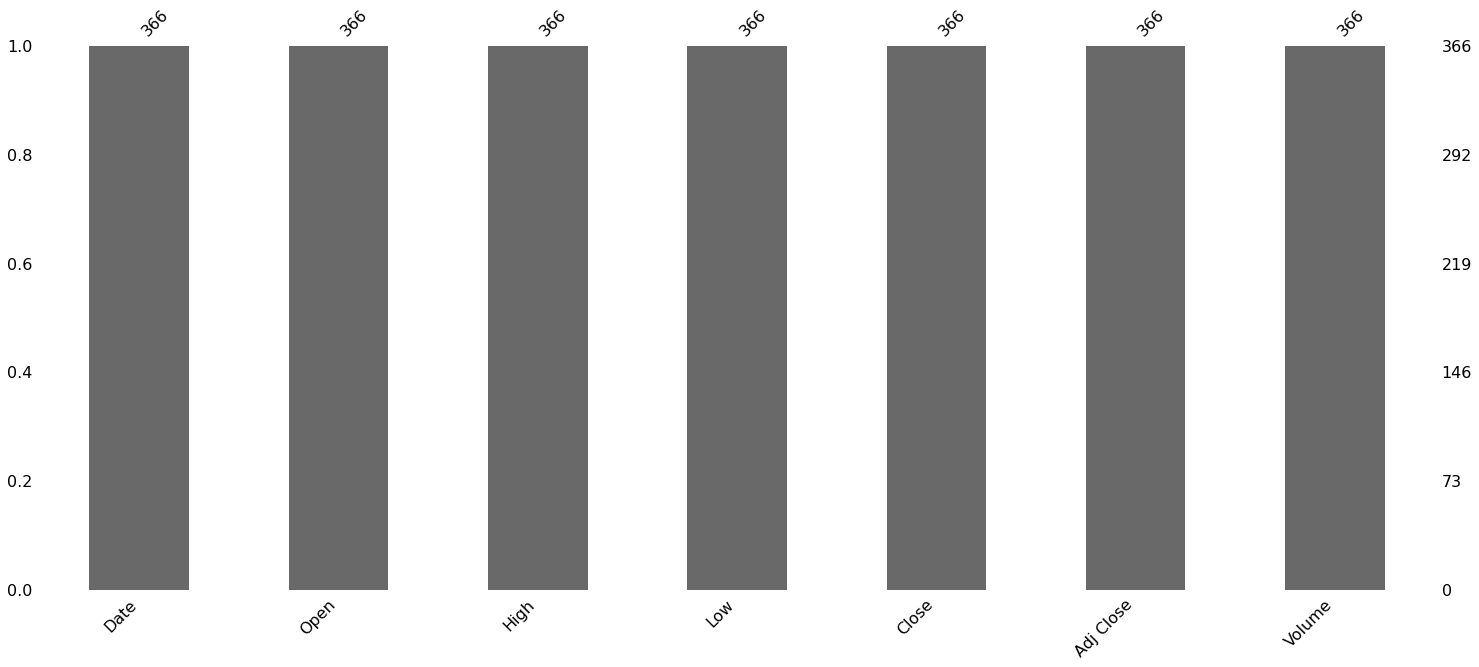

In [16]:
msno.bar(df);

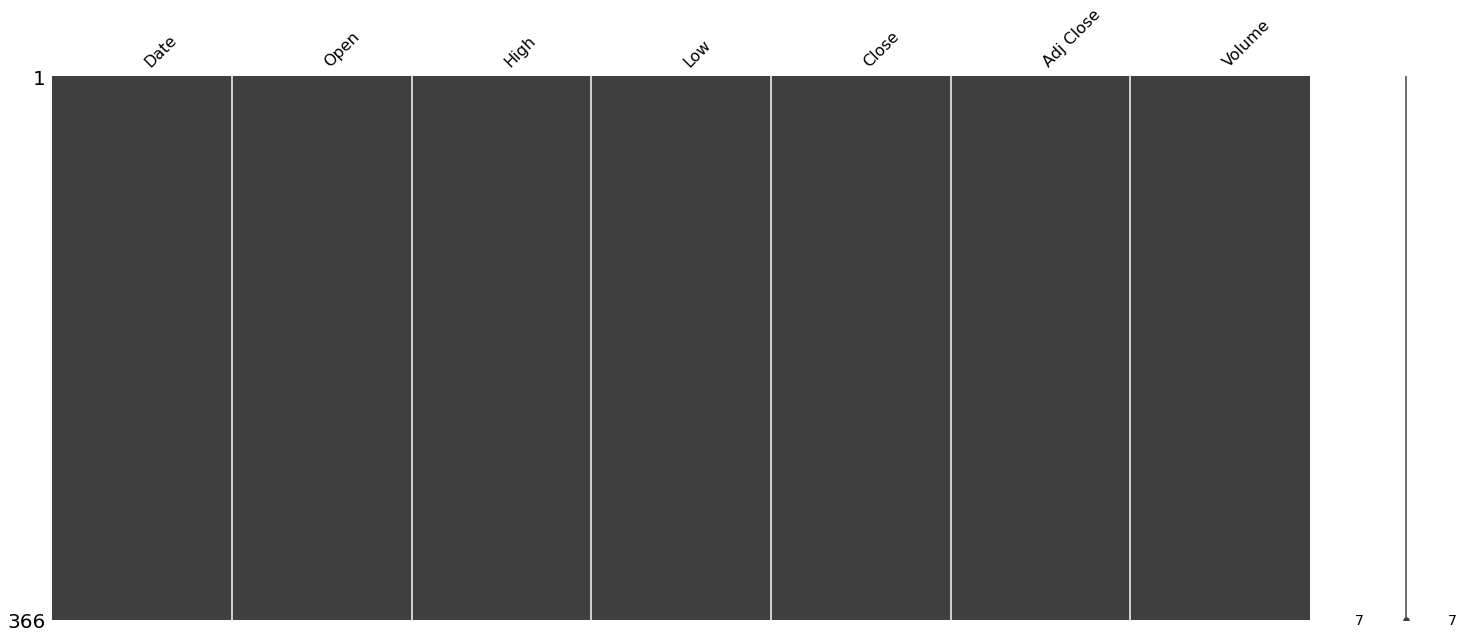

In [17]:
msno.matrix(df); #eksik veri olmadığının görseli 

# Aykırı Değer? #

In [18]:
df=pd.DataFrame(df) #verimizi dataframe'e çevirdik

In [19]:
price=df['Close'] #işlem yapılacak sütun

In [20]:
price

0      15565.880859
1      14833.753906
2      15479.567383
3      15332.315430
4      15290.902344
           ...     
361    63226.402344
362    62970.046875
363    61452.230469
364    61125.675781
365    60698.382813
Name: Close, Length: 366, dtype: float64

In [21]:
type(price)

pandas.core.series.Series

In [22]:
price.iloc[0:10] #ilk 10 veri

0    15565.880859
1    14833.753906
2    15479.567383
3    15332.315430
4    15290.902344
5    15701.339844
6    16276.343750
7    16317.808594
8    16068.138672
9    15955.587891
Name: Close, dtype: float64

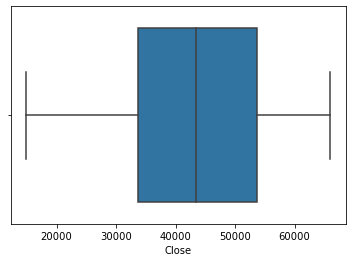

In [23]:
import seaborn as sns
sns.boxplot(x=price);

In [24]:
Q1=price.quantile(0.25)
Q3=price.quantile(0.75)
IQR=Q3-Q1
Q1

33728.7714845

In [25]:
Q3

53743.265625

In [26]:
IQR

20014.4941405

In [27]:
alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR
alt_sinir

3707.0302737500024

In [28]:
ust_sinir

83765.00683575

In [29]:
(price<(alt_sinir))|(price>(ust_sinir)) #aykırı değerlerdir

0      False
1      False
2      False
3      False
4      False
       ...  
361    False
362    False
363    False
364    False
365    False
Name: Close, Length: 366, dtype: bool

In [30]:
aykiri_alt=(price<alt_sinir)
aykiri_alt.iloc[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Close, dtype: bool

In [31]:
price[aykiri_alt].index

Int64Index([], dtype='int64')

In [32]:
aykiri_ust=(price>ust_sinir)
aykiri_ust.iloc[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Close, dtype: bool

In [33]:
price[aykiri_ust].index

Int64Index([], dtype='int64')

In [34]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-06,15579.729492,15903.437500,15226.839844,15565.880859,15565.880859,39837841971
1,2020-11-07,15565.880859,15737.095703,14423.203125,14833.753906,14833.753906,35024953706
2,2020-11-08,14833.753906,15637.320313,14744.110352,15479.567383,15479.567383,26632075029
3,2020-11-09,15479.595703,15785.136719,14865.529297,15332.315430,15332.315430,34149115566
4,2020-11-10,15332.350586,15450.329102,15124.959961,15290.902344,15290.902344,25574938143
...,...,...,...,...,...,...,...
361,2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,63226.402344,37746665647
362,2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,36124731509
363,2021-11-04,62941.804688,63123.289063,60799.664063,61452.230469,61452.230469,32615846901
364,2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,30605102446


In [35]:
!conda install -c conda-forge fbprophet -y

Solving environment: ...working... done

# All requested packages already installed.



In [36]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\anaconda3\lib\site-packages (5.4.0)


In [37]:
from fbprophet import Prophet #facebook prophet kütüphanesi dahil edildi

In [38]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-06,15579.729492,15903.437500,15226.839844,15565.880859,15565.880859,39837841971
1,2020-11-07,15565.880859,15737.095703,14423.203125,14833.753906,14833.753906,35024953706
2,2020-11-08,14833.753906,15637.320313,14744.110352,15479.567383,15479.567383,26632075029
3,2020-11-09,15479.595703,15785.136719,14865.529297,15332.315430,15332.315430,34149115566
4,2020-11-10,15332.350586,15450.329102,15124.959961,15290.902344,15290.902344,25574938143
...,...,...,...,...,...,...,...
361,2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,63226.402344,37746665647
362,2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,36124731509
363,2021-11-04,62941.804688,63123.289063,60799.664063,61452.230469,61452.230469,32615846901
364,2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,30605102446


In [39]:
df1=df[["Date","Close"]] #Date ve Son işlem yapılan kapanış fiyatı olan bitcoin fiyat sütununu aldık

In [40]:
df1

,Date,Close
0,2020-11-06,15565.880859
1,2020-11-07,14833.753906
2,2020-11-08,15479.567383
3,2020-11-09,15332.315430
4,2020-11-10,15290.902344
...,...,...
361,2021-11-02,63226.402344
362,2021-11-03,62970.046875
363,2021-11-04,61452.230469
364,2021-11-05,61125.675781


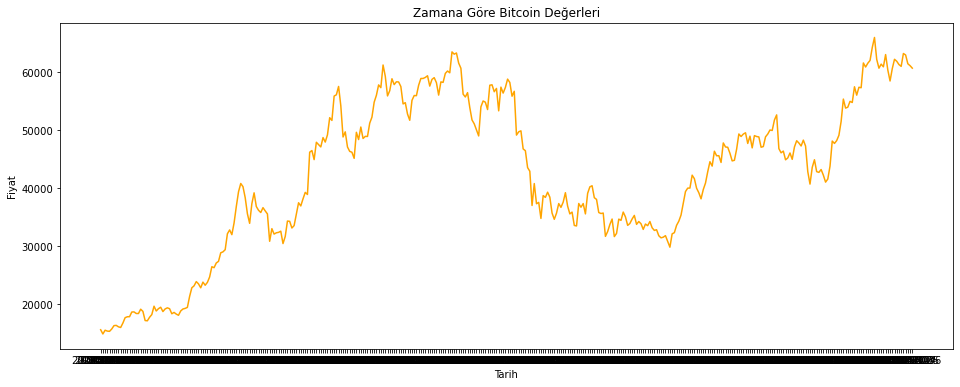

In [41]:
#Tarihe göre bitcoin değerlerinin görselleştirilmesi
plt.figure(figsize=(16,6))
plt.plot(df1.Date,df1.Close,color="orange",) 
plt.title("Zamana Göre Bitcoin Değerleri")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.show()

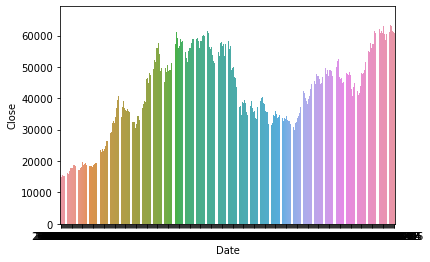

In [42]:
sns.barplot( x= "Date", y = df1.Close , data=df1)

In [43]:
df2=df1.rename(columns={'Date':'ds','Close':'y'})

In [44]:
df2

,ds,y
0,2020-11-06,15565.880859
1,2020-11-07,14833.753906
2,2020-11-08,15479.567383
3,2020-11-09,15332.315430
4,2020-11-10,15290.902344
...,...,...
361,2021-11-02,63226.402344
362,2021-11-03,62970.046875
363,2021-11-04,61452.230469
364,2021-11-05,61125.675781


In [45]:
from fbprophet import Prophet

In [46]:
!pip install pystan==2.19.1.1

  Attempting uninstall: pystan
    Found existing installation: pystan 2.18.0.0
    Uninstalling pystan-2.18.0.0:
      Successfully uninstalled pystan-2.18.0.0


ERROR: fbprophet 0.7.1 requires cmdstanpy==0.9.5, which is not installed.
ERROR: fbprophet 0.7.1 requires setuptools-git>=1.2, which is not installed.


In [47]:
model=Prophet() #prophet model değişkenine atandı

In [48]:
model.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
mfd = model.make_future_dataframe(periods=30) #model nesnesini ve tahmini için birkaç nokta alır ve uygun bir veri çerçevesi oluşturur
#gelecek 30 gün için

In [50]:
pred= model.predict(mfd) #tahminleme işlemi yapılıyor

In [52]:
pred.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-06,11357.936200,6235.712164,16515.066729,11357.936200,11357.936200,223.137946,223.137946,223.137946,223.137946,223.137946,223.137946,0.0,0.0,0.0,11581.074146
1,2020-11-07,11694.699823,6663.928635,16991.596148,11694.699823,11694.699823,163.681713,163.681713,163.681713,163.681713,163.681713,163.681713,0.0,0.0,0.0,11858.381536
2,2020-11-08,12031.463446,6930.921707,17000.295097,12031.463446,12031.463446,47.404504,47.404504,47.404504,47.404504,47.404504,47.404504,0.0,0.0,0.0,12078.867949
3,2020-11-09,12368.227069,7565.368625,17576.858813,12368.227069,12368.227069,-51.648661,-51.648661,-51.648661,-51.648661,-51.648661,-51.648661,0.0,0.0,0.0,12316.578408
4,2020-11-10,12704.990692,7279.295157,17812.112779,12704.990692,12704.990692,-238.036738,-238.036738,-238.036738,-238.036738,-238.036738,-238.036738,0.0,0.0,0.0,12466.953953
5,2020-11-11,13041.754315,7831.772790,18291.287372,13041.754315,13041.754315,12.597071,12.597071,12.597071,12.597071,12.597071,12.597071,0.0,0.0,0.0,13054.351386
6,2020-11-12,13378.517938,8454.560666,18490.519700,13378.517938,13378.517938,-157.135835,-157.135835,-157.135835,-157.135835,-157.135835,-157.135835,0.0,0.0,0.0,13221.382103
7,2020-11-13,13715.281561,8784.099212,19035.675650,13715.281561,13715.281561,223.137946,223.137946,223.137946,223.137946,223.137946,223.137946,0.0,0.0,0.0,13938.419507
8,2020-11-14,14052.045184,9390.384337,19573.974160,14052.045184,14052.045184,163.681713,163.681713,163.681713,163.681713,163.681713,163.681713,0.0,0.0,0.0,14215.726897
9,2020-11-15,14388.808807,9637.639405,19568.688422,14388.808807,14388.808807,47.404504,47.404504,47.404504,47.404504,47.404504,47.404504,0.0,0.0,0.0,14436.213311


In [53]:
pred.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
386,2021-11-27,65751.801002,60965.344080,71278.878027,64707.509338,66928.825831,163.681713,163.681713,163.681713,163.681713,163.681713,163.681713,0.0,0.0,0.0,65915.482716
387,2021-11-28,65977.242746,60692.534210,71411.870755,64860.660745,67263.488864,47.404504,47.404504,47.404504,47.404504,47.404504,47.404504,0.0,0.0,0.0,66024.647249
388,2021-11-29,66202.684489,60873.648199,71704.957048,64979.390115,67616.579972,-51.648661,-51.648661,-51.648661,-51.648661,-51.648661,-51.648661,0.0,0.0,0.0,66151.035828
389,2021-11-30,66428.126233,61010.802176,71900.088580,65120.530478,67908.592589,-238.036738,-238.036738,-238.036738,-238.036738,-238.036738,-238.036738,0.0,0.0,0.0,66190.089494
390,2021-12-01,66653.567976,61285.511123,72256.885800,65260.940239,68224.985658,12.597071,12.597071,12.597071,12.597071,12.597071,12.597071,0.0,0.0,0.0,66666.165047
391,2021-12-02,66879.009719,61352.142891,71975.005018,65400.771957,68555.591097,-157.135835,-157.135835,-157.135835,-157.135835,-157.135835,-157.135835,0.0,0.0,0.0,66721.873885
392,2021-12-03,67104.451463,61991.864110,72686.993432,65507.862276,68864.351151,223.137946,223.137946,223.137946,223.137946,223.137946,223.137946,0.0,0.0,0.0,67327.589409
393,2021-12-04,67329.893206,61802.839748,73278.289892,65649.420674,69230.406398,163.681713,163.681713,163.681713,163.681713,163.681713,163.681713,0.0,0.0,0.0,67493.574919
394,2021-12-05,67555.334950,61996.018111,73044.544893,65797.822508,69602.262427,47.404504,47.404504,47.404504,47.404504,47.404504,47.404504,0.0,0.0,0.0,67602.739453
395,2021-12-06,67780.776693,62441.677822,73358.155153,65946.470129,69924.841658,-51.648661,-51.648661,-51.648661,-51.648661,-51.648661,-51.648661,0.0,0.0,0.0,67729.128032


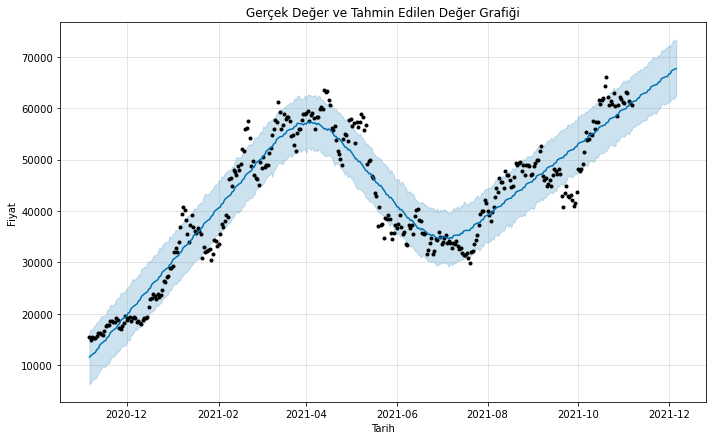

In [55]:
model.plot(pred)
plt.title("Gerçek Değer ve Tahmin Edilen Değer Grafiği")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.show()

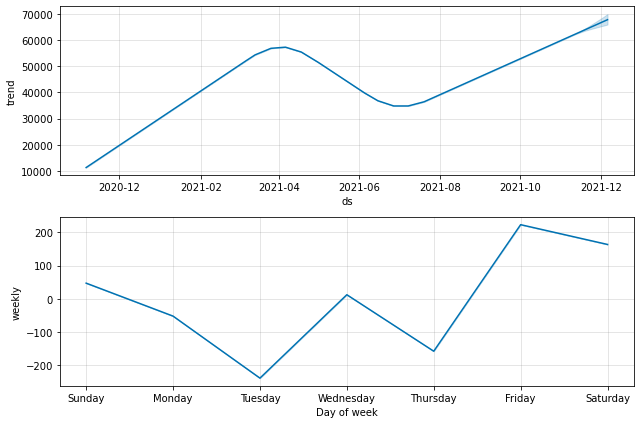

In [64]:
visulation=model.plot_components(pred) #Tahmin bileşenleri haftalık